# import the dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Iris Data

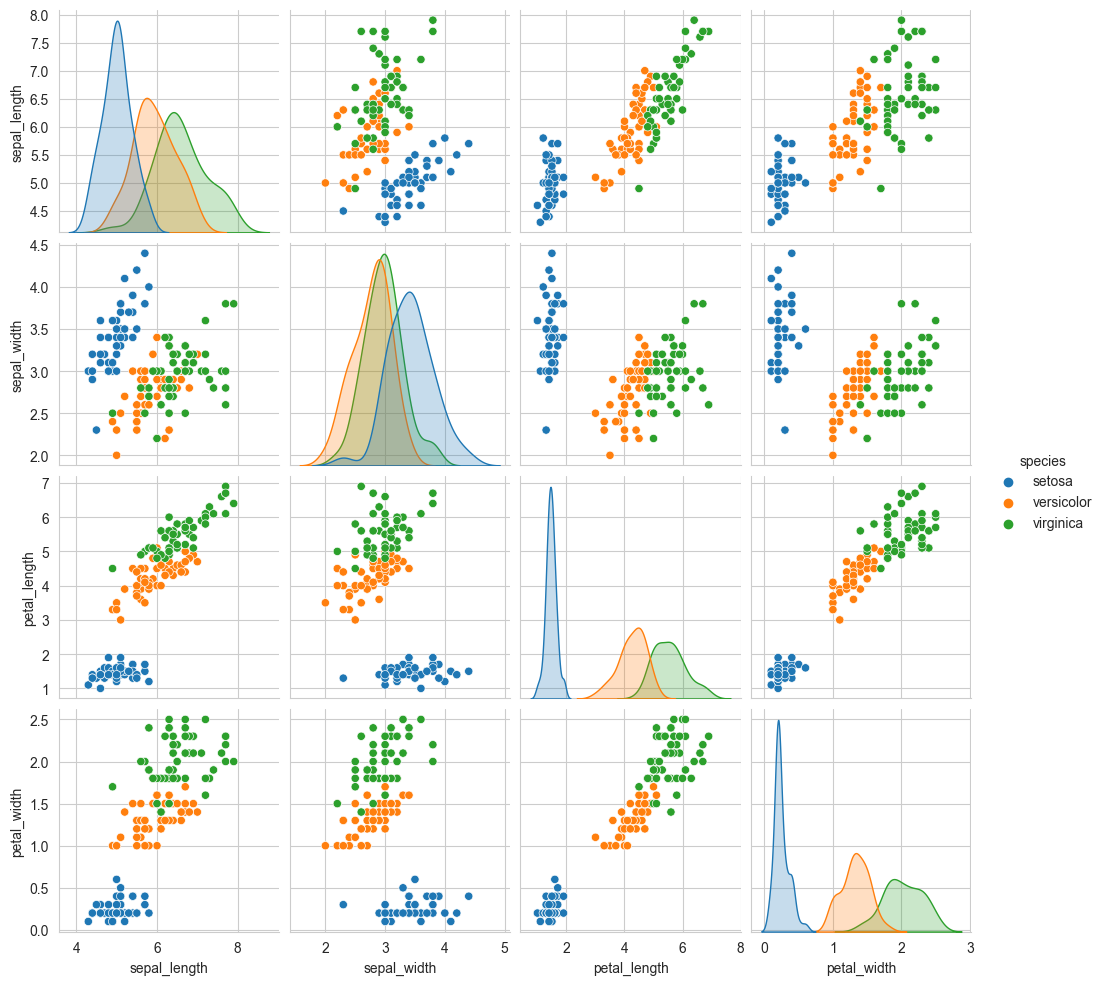

In [47]:
# Load the Iris dataset
iris = datasets.load_iris()

# Extract the sepal length and sepal width features
sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
petal_length = iris.data[:, 2]
petal_width = iris.data[:, 3]

# Extract the target labels (species)
species = iris.target
species = ["setosa" if sp == 0 else "versicolor" if sp == 1 else "virginica" for sp in species]

data = pd.DataFrame({
    'sepal_length': sepal_length,
    'sepal_width':sepal_width,
    'petal_length':petal_length,
    'petal_width':petal_width,
    'species': species,
})

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.pairplot(data, hue='species', vars=features)

# Glass dataset

In [48]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables) 


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [19]:
glass_df = X.copy(deep=True)
glass_df["type"] = y

In [20]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


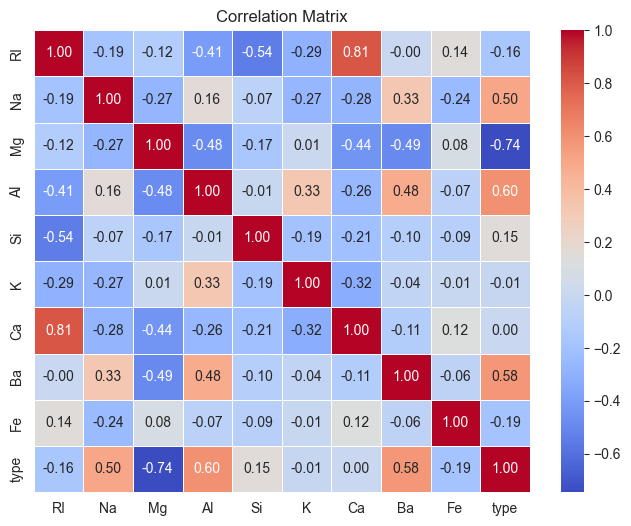

In [21]:
correlation_matrix = glass_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\4210890309.py:12: UserWarning: The palette list has more values (15) than needed (6), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


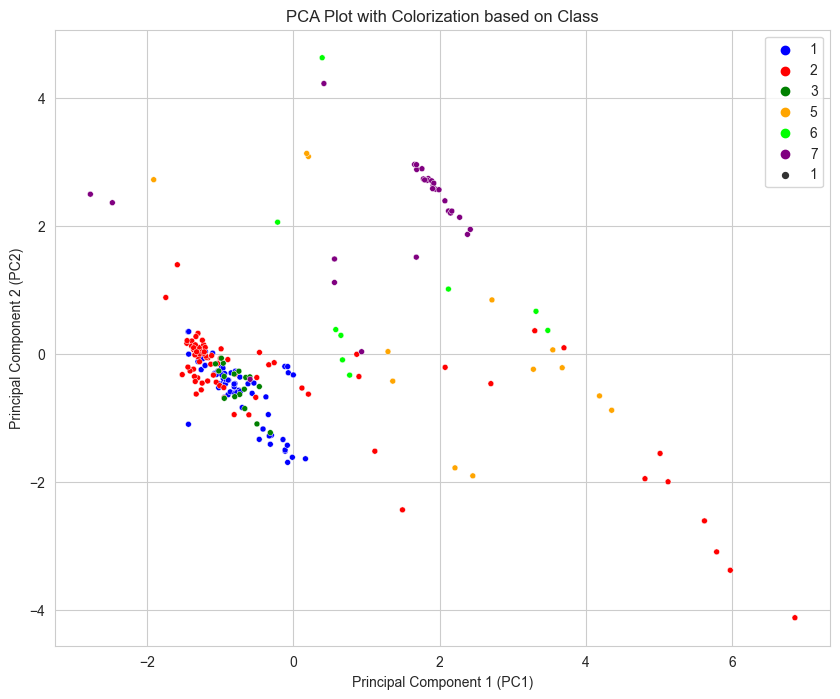

In [57]:
scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
# principal_components = pca.fit_transform(scaled_features)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = [str(y_) for y_ in list(y.Type_of_glass)]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\380546559.py:12: UserWarning: The palette list has more values (15) than needed (6), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


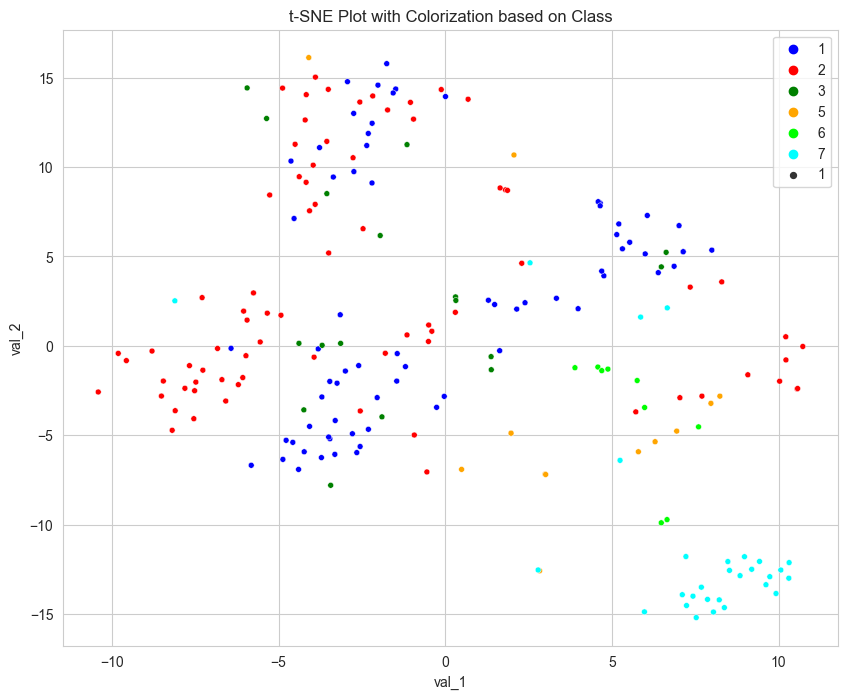

In [59]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua' , 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()

# Wine dataset

In [60]:
 
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\3234888110.py:12: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


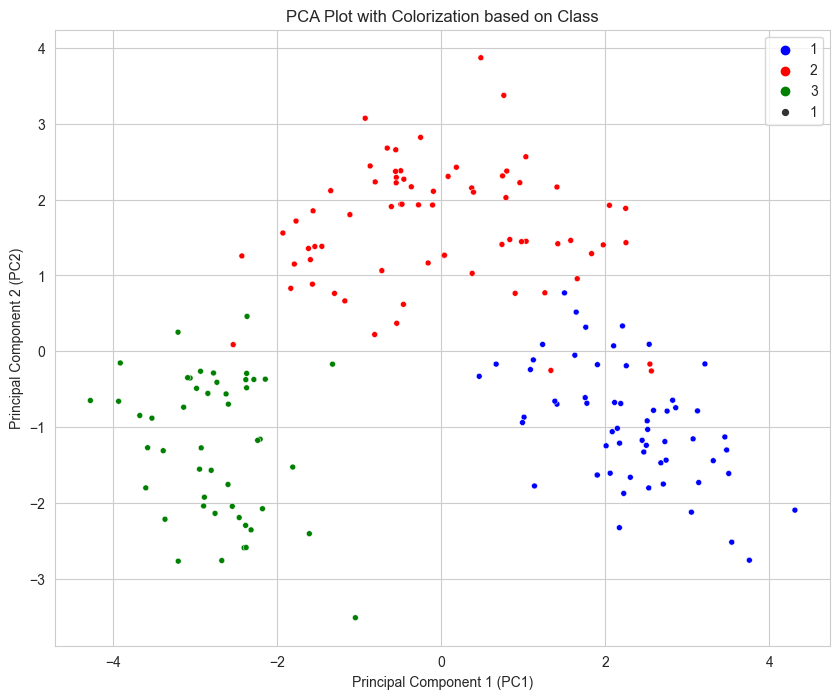

In [45]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(scaled_features)
# principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\2305456421.py:12: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


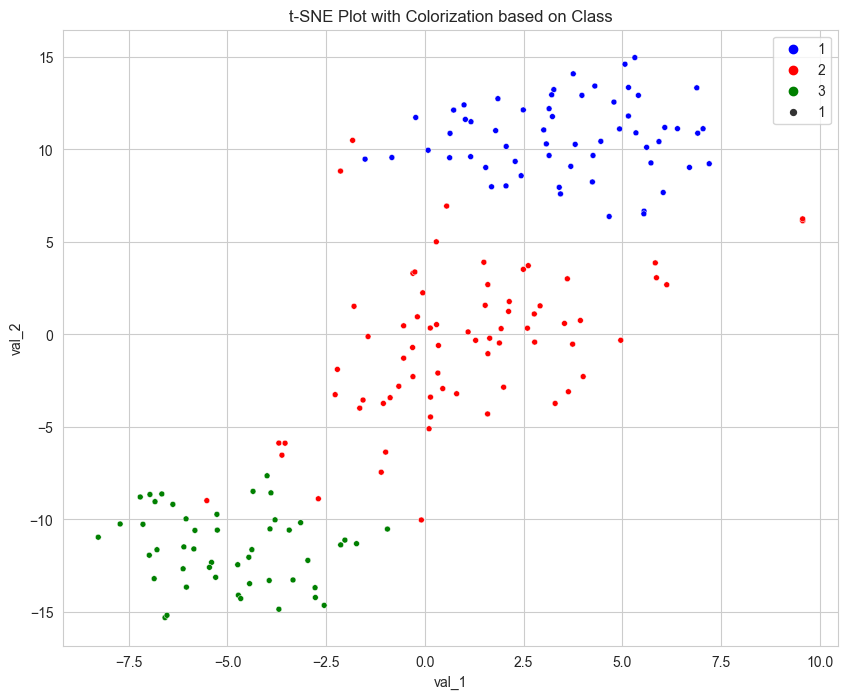

In [46]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua', 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()

# Wiskonsin breast cancer

In [61]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\3234888110.py:12: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


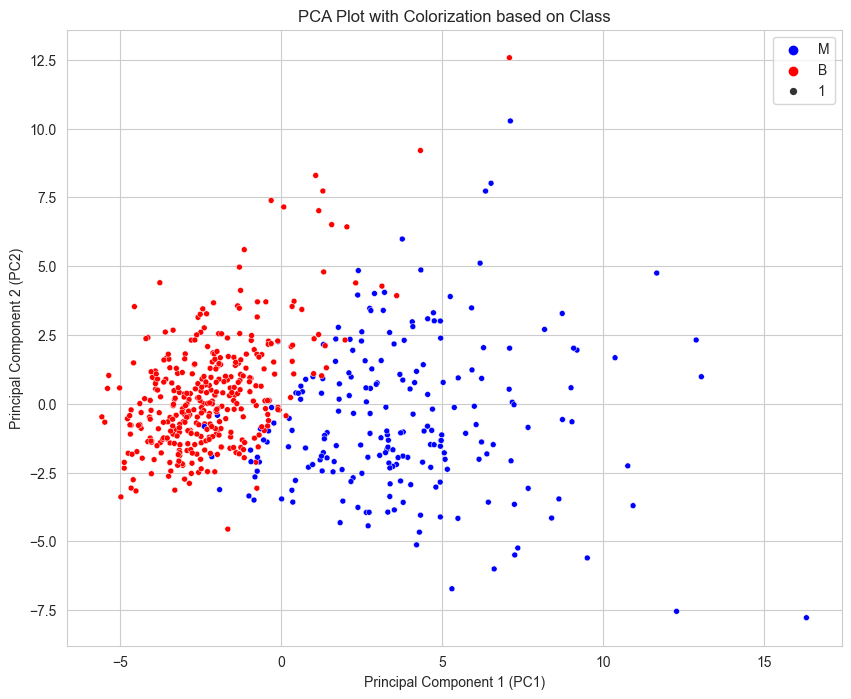

In [62]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(scaled_features)
# principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\2305456421.py:12: UserWarning: The palette list has more values (15) than needed (2), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


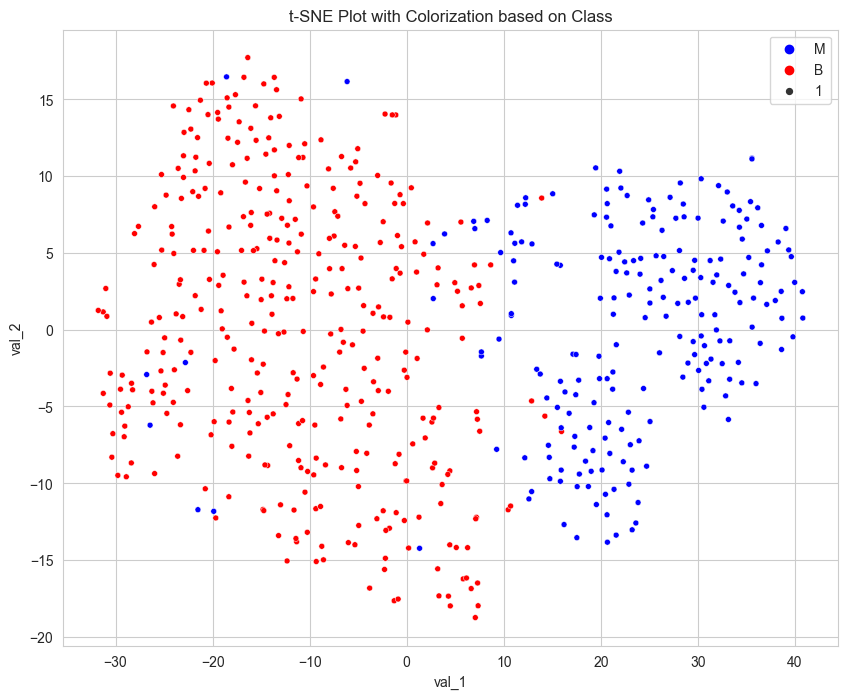

In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua', 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()

# Urology data, for multiagent fuzzy clustering method testing

In [71]:
urology = pd.read_csv("../test_data/urology_prepared/standard_scaler.csv").drop(columns=['Unnamed: 0'])
X = urology.drop(columns=["cluster"])
y = urology[["cluster"]]

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\279414297.py:13: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


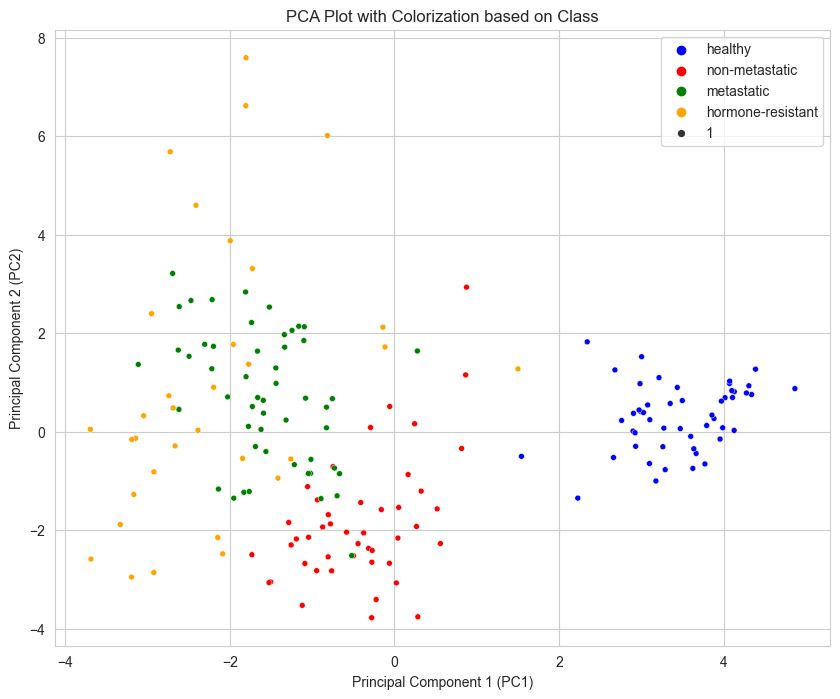

In [84]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(scaled_features)
# principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
cl_dict = {0: "healthy", 1: "non-metastatic", 2: "metastatic", 3: "hormone-resistant"}
pca_df['class'] = [cl_dict[y_] for y_ in y.cluster]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\3484660340.py:13: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


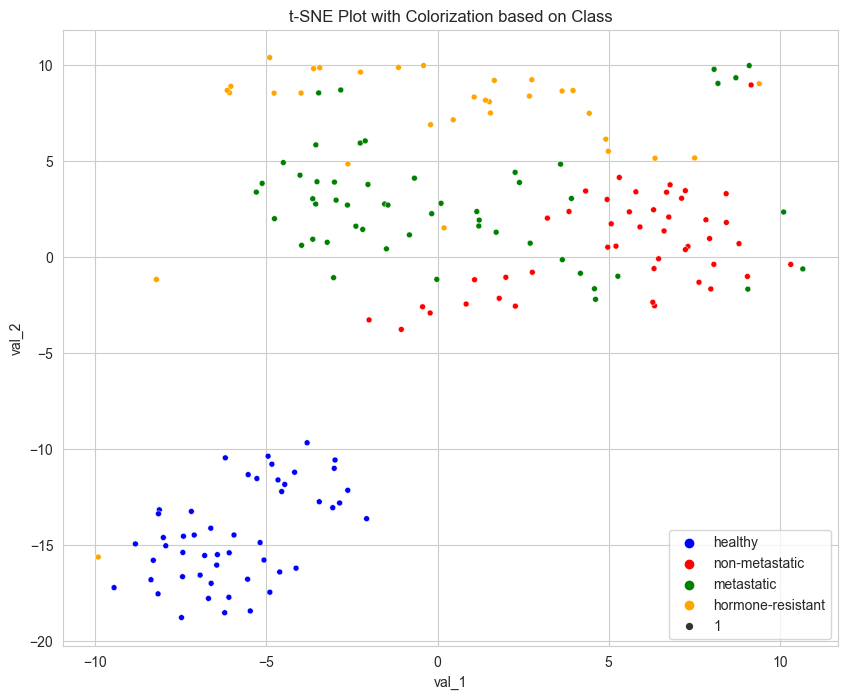

In [85]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
cl_dict = {0: "healthy", 1: "non-metastatic", 2: "metastatic", 3: "hormone-resistant"}
pca_df['class'] = [cl_dict[y_] for y_ in y.cluster]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua', 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()

In [78]:
urology.columns = ['Age', 'Number of urinations', 'Number of imp pos', 'Night. urine test', 'Stranguria', 'OZM', 'HZM', 'Residual urine count', 'Ur. Dustor (yes/no)','Physical volume (cm3/mm)', 'PSA', 'Hemoglobin', 'ESR', 'Leukocytes',"Lymphocytes", 'Ud. weight', 'Erythrocytes', 'Urine leukocytes','Lymphadenopathy (yes/no)', 'Bones', 'Spine', 'G', 'Glisson','cluster']

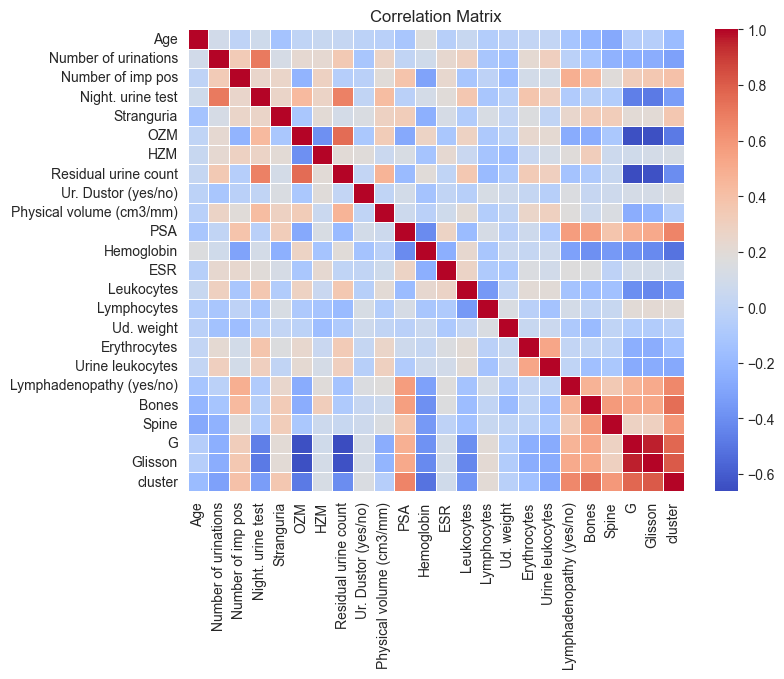

In [81]:
correlation_matrix = urology.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Heard disease dataset

In [87]:
hd_data = pd.read_csv('../for_uni_report/data/heart_disease_uci.csv').drop(columns=['id'])
hd_data["class"] = hd_data["num"]
hd_data = hd_data.drop(columns=['num', 'dataset'])
hd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,class
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [88]:
for column in ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]:
    hd_data[column].fillna(hd_data[column].mode()[0], inplace=True)

for column in ["trestbps", "chol", "thalch", "oldpeak", "ca"]:
    hd_data[column].fillna(hd_data[column].median(), inplace=True)

In [89]:
hd_data["sex"] = pd.Categorical(hd_data["sex"]).codes
hd_data["cp"] = pd.Categorical(hd_data["cp"]).codes
hd_data["fbs"] = pd.Categorical(hd_data["fbs"]).codes
hd_data["restecg"] = pd.Categorical(hd_data["restecg"]).codes
hd_data["exang"] = pd.Categorical(hd_data["exang"]).codes
hd_data["slope"] = pd.Categorical(hd_data["slope"]).codes
hd_data["thal"] = pd.Categorical(hd_data["thal"]).codes

In [90]:
X = hd_data.drop(columns=["class"])
y = hd_data["class"]

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\3234888110.py:12: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


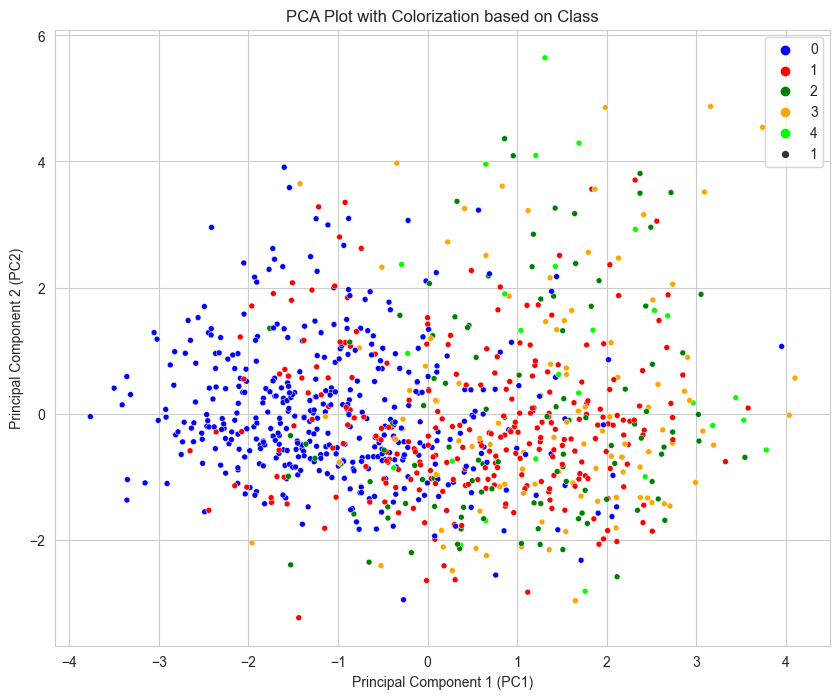

In [91]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(scaled_features)
# principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_29896\2305456421.py:12: UserWarning: The palette list has more values (15) than needed (5), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


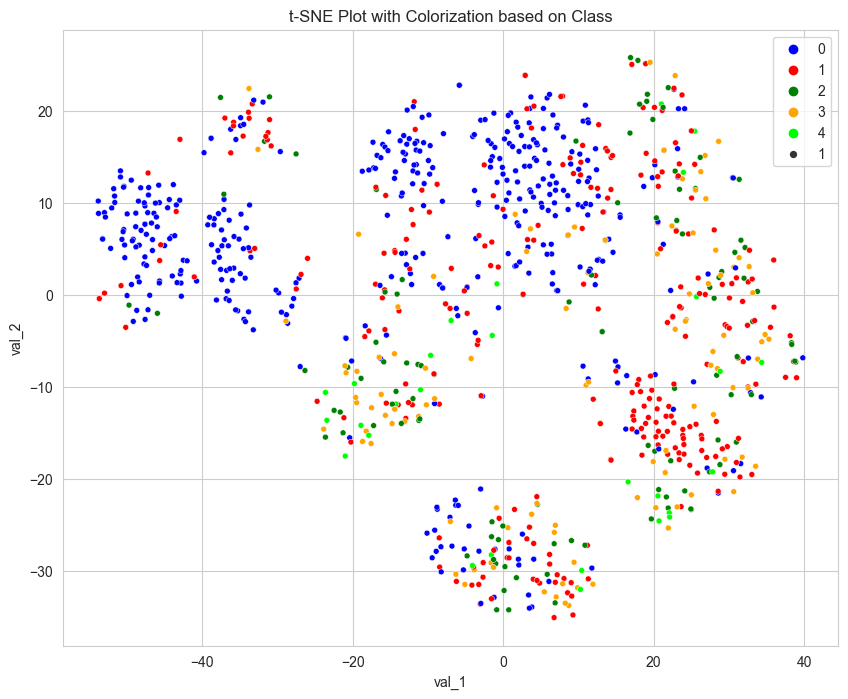

In [92]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua', 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()

In [95]:
hd_data = hd_data.rename(columns={'sex': 'gender'})

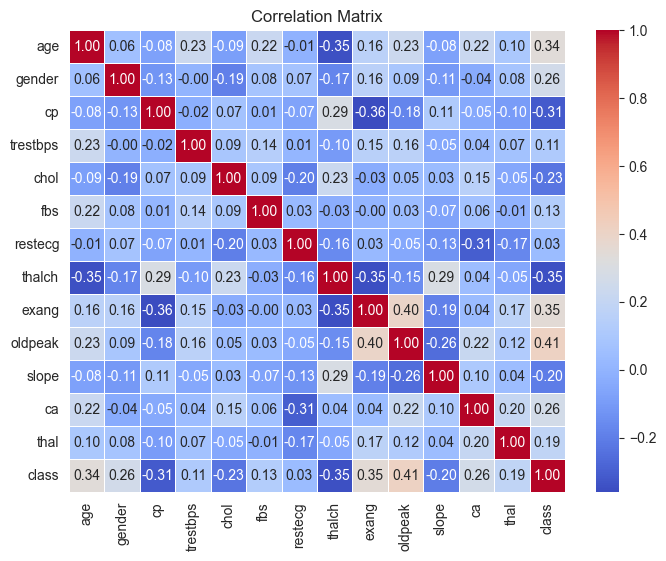

In [96]:
correlation_matrix = hd_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# diabetes disease

In [2]:
df=pd.read_csv('../for_article_diabetes_health_indicators/data/diabetes_012_health_indicators_BRFSS2021.csv')
df['Diabetes_012'] = [int(x) for x in df['Diabetes_012']]
df = df.rename(columns={'sex': 'gender'})
df = df.rename(columns={'Diabetes_012': 'class'})

In [3]:
df = df.drop_duplicates()

In [4]:
X = df.drop('class', axis=1)
y = df['class']

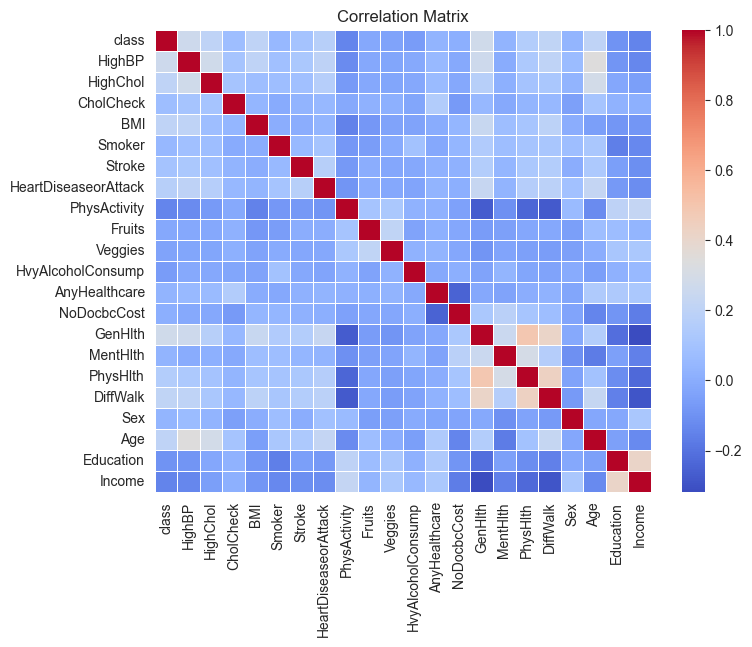

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_17116\2457535053.py:16: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


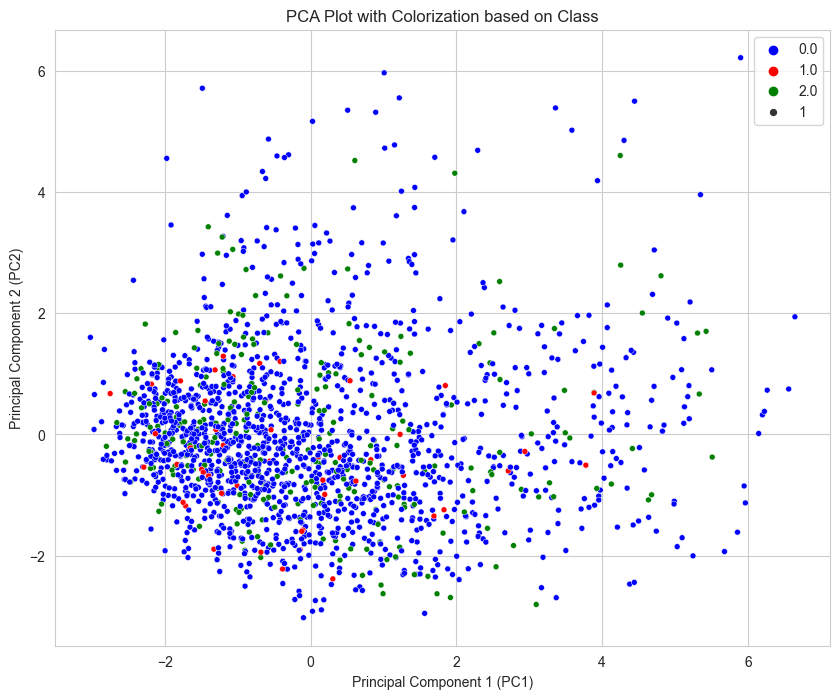

In [7]:
df_ = df.sample(20_000)
X = df_.drop('class', axis=1)
y = df_['class']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Set the number of components as needed
principal_components = pca.fit_transform(scaled_features)
# principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime', 'purple',
                         'aqua', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'yellow'], size=1)
plt.title('PCA Plot with Colorization based on Class')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()

C:\Users\voldo\AppData\Local\Temp\ipykernel_17116\3015118381.py:16: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,


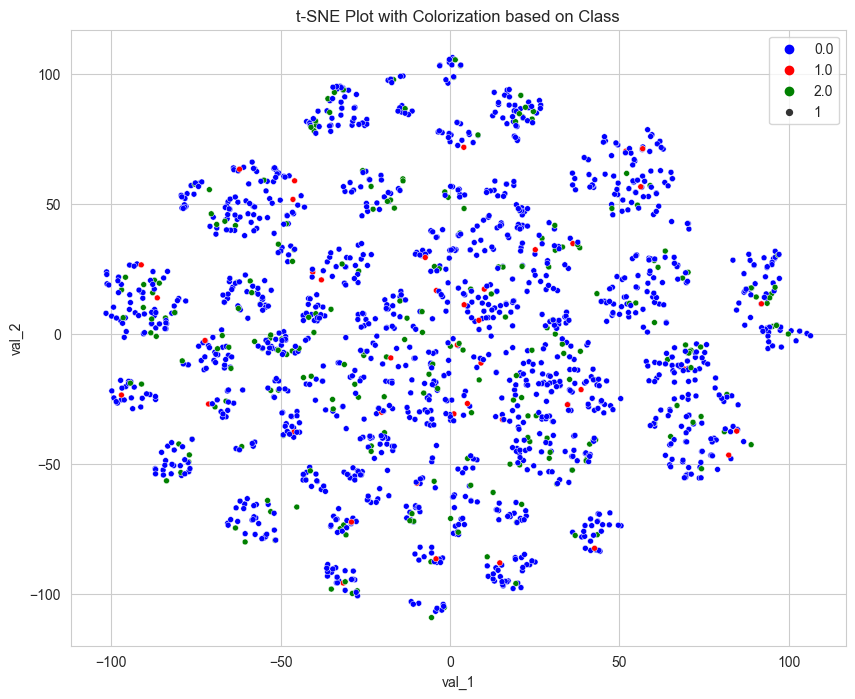

In [8]:
df_ = df.sample(20_000)
X = df_.drop('class', axis=1)
y = df_['class']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=43)
principal_components = tsne.fit_transform(scaled_features)
# principal_components = tsne.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df,
                palette=['blue', 'red', 'green', 'orange', 'lime',
                         'aqua', 'yellow', 'navy', 'coral', 'teal', 'mustard', 'black', 'pink',
                         'maroon', 'purple'], size=1)
plt.title('t-SNE Plot with Colorization based on Class')
plt.xlabel('val_1')
plt.ylabel('val_2')
plt.legend()
plt.show()